In [1]:
# Monday 23 Sep 2024
#
# w03 Model comparison and hypothesis testing
#
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

obs = [1,29,3,7]
exp = [3,27,1,9]

# df = degrees of freedom
# df = 4 - constraints 
c  = 3      # 3 constraints: N_v = 30, N_c = 10, f_H0 = 1/10
df = 4 - c  # df = 1

# the chi2 val
# calculated directly
#
chi2val = 0
for i in range(len(obs)):
    chi2val += (obs[i]-exp[i])*(obs[i]-exp[i])/exp[i]
print("The chi-square value calculated using the definition")
print("chi square ", chi2val)


The chi-square value calculated using the definition
chi square  5.925925925925926


In [2]:
# The p-value calculated using the chi2 distribution 
#                        + the definition of p-value
#
pval = 1-stats.chi2.cdf(chi2val, df, loc=0, scale=1)
print("\nThe p-value calculated using the chi2 distribution and the definition of p-value")
print("chi square ", chi2val, "p-value ", pval, " at df = ", df)



The p-value calculated using the chi2 distribution and the definition of p-value
chi square  5.925925925925926 p-value  0.014919696305821906  at df =  1


In [3]:
# the chi2 val
# calculated using the chisquare function in stats
#
df = 1
chi2vala, pvala = stats.chisquare(obs, exp, ddof=df)
print("\nThe p-value calculated using the numpy function chisquare")
print("chi square ", chi2vala, "p-value ", pvala, " at df = ", df)




The p-value calculated using the numpy function chisquare
chi square  5.925925925925926 p-value  0.05166560687888461  at df =  1


In [4]:
# why different??
# from the documentation of chisquare:
#
# The p-value is computed using a chi-squared distribution with 
# k - 1 - ddof degrees of freedom, where k is the number of observed 
# frequencies
df = 2
chi2vala, pvala = stats.chisquare(obs, exp, ddof=df)
print("\nThe p-value calculated using the numpy function chisquare")
print("chi square ", chi2vala, "p-value ", pvala, " at df = ", df)



The p-value calculated using the numpy function chisquare
chi square  5.925925925925926 p-value  0.014919696305821892  at df =  2


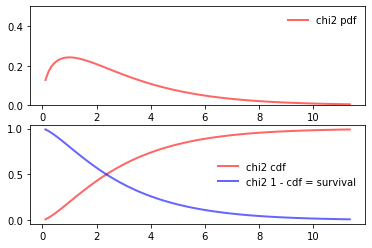

In [5]:
df = 3
# The chisquare distribution
#
fig, ax = plt.subplots(2, 1)
x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)

# the PDF
ax[0].plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 pdf')
ax[0].legend(loc='best', frameon=False)
ax[0].set_ylim([0,0.5])

# CDF   
#
# 1-CDF = Survival = p-value
#
ax[1].plot(x, stats.chi2.cdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 cdf')
ax[1].plot(x, stats.chi2.sf(x, df),  'b-', lw=2, alpha=0.6, label='chi2 1 - cdf = survival')
ax[1].legend(loc='best', frameon=False)
plt.show()




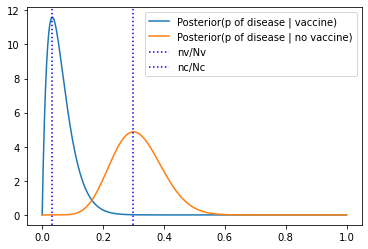

f_v max 0.03333333333333333
f_c max 0.3


In [6]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as special
import decimal

def binomial_posterior(f, N, n):
    ff = 1.0 - f # probability of not contracting disease
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.real(special.loggamma(N+2))
    logcoeff -= np.real(special.loggamma(N-n+1))
    logcoeff -= np.real(special.loggamma(n+1))
                      
    
    # pdf    = coeff * f^n * (1-f)^{N-n}
    # logpdf = locoeff + n*log(f) + (N-n)*log(1-f)
    logpdf = logcoeff + n*np.log(f) + (N-n)*np.log(ff)
    pdf    = np.exp(logpdf)
                    
    return pdf, logpdf

def binomial_pdata(f, N, n):
    ff = 1.0 - f # probability of not contracting disease
    
    # log[(N)!] - log[n!] - log[N-n)!]
    logcoeff  = np.real(special.loggamma(N+1))
    logcoeff -= np.real(special.loggamma(N-n+1))
    logcoeff -= np.real(special.loggamma(n+1))
                      
    
    # pdf = coeff * f^n * (1-f)^{N-n}
    # logpdf = locoeff + n*log(f) + (N-n)*log(1-f)
    logpdf = logcoeff + n*np.log(f) + (N-n)*np.log(ff)
    pdf    = np.exp(logpdf)
                    
    return pdf, logpdf

                
# Class example
#
Nv = 30 # volunteers that have received the vaccine
Nc = 3*10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3*3  # no vaccine and contracted plague

# the probability of contracting disease
f_max  = 0.9999999999
f_min  = 0.0000000001
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) 

# the posteriors: P(f_v) and P(f_c)
#
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

# max value
#  
f_v_max = nv/Nv
f_c_max = nc/Nc

plt.plot(f, pdf_v[0], label = "Posterior(p of disease | vaccine)")
plt.plot(f, pdf_c[0], label = "Posterior(p of disease | no vaccine)")
plt.axvline(x=f_v_max, color='b', ls=':', label='nv/Nv')
plt.axvline(x=f_c_max, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()
print("f_v max", f_v_max)
print("f_c max", f_c_max)

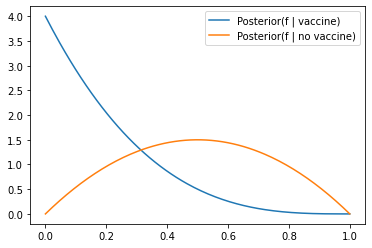

In [7]:
# when there is very little data
#
Nv = 3 # volunteers that have received the vaccine
Nc = 2 # volunteers in control group (no vaccine)
nv = 0 # received vaccine and contracted disease
nc = 1 # no vaccine and contracted disease

f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
# the probability of contracting disease
f      = np.linspace(f_min, f_max, f_nbin) 

# posterior probs as a function of data
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

plt.plot(f, pdf_v[0], label = "Posterior(f | vaccine)")
plt.plot(f, pdf_c[0], label = "Posterior(f | no vaccine)")
plt.legend(loc="upper right")
plt.show()

In [8]:
# H1 = fv < fc
#
# P(H1| data) = P(fv < fc| data)
#
Nv = 30 # volunteers that have received the vaccine
Nc = 3*10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3*3  # no vaccine and contracted plague

f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)

# the probability of contracting disease
f      = np.linspace(f_min, f_max, f_nbin) 

# posterior probs as a function of data
pdf_v  = binomial_posterior(f, Nv, nv)
pdf_c  = binomial_posterior(f, Nc, nc)

prob_H1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc:
            prob_H1  += pdf_v[0][bv]*pdf_c[0][bc]
                 
prob_H1 *= f_bin * f_bin        
print("P(H1 = [fv < fc] | data) = ", prob_H1)

  

P(H1 = [fv < fc] | data) =  0.990525717780486


In [9]:
# H0 = [fc = fv]
# P(H0 | data)
#
prob_H0 = 0

for b in range(f_nbin):
    f = f_min + b*f_bin
    prob_H0 += pdf_v[0][b]*pdf_c[0][b]
            
prob_H0 *= f_bin            
print("P(H0 = [fc = fv] |data) =", prob_H0)

# ratio
print ("P(H1|data)/P(H0|data) =", prob_H1/prob_H0)


P(H0 = [fc = fv] |data) = 0.08940524738295692
P(H1|data)/P(H0|data) = 11.079055724074951


median    a= 0.787880909090909
max(mode) a= 0.8989909090909091


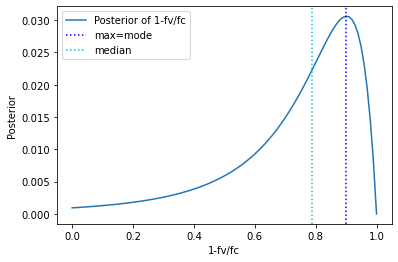

In [10]:
# posterior of the efficacy = 1-fv/fc
#
# 0 <= a = 1-fv/fc <= 1
#
# or    fv = (1-a)fc
#
a_min  = 0.00001
a_max  = 1.0
a_nbin = 100
a = np.linspace(a_min, a_max, a_nbin) 

Nv = 30 # volunteers that received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

#Nv = 15000 # volunteers that received the vaccine
#Nc = 15000 # volunteers in control group (no vaccine)
#nv = 5     # received vaccine and contracted Covid-19
#nc = 90    # no vaccine and contracted Covid-19
f_min   = 0.0000001
f_max   = 0.9999999
f_bsize = 1/(100*np.sqrt(max(Nc,Nv)))
f_nbin  = int((f_max-f_min)/f_bsize)
    
prior = 1/(f_max-f_min)

post_a      = []
post_a_norm = 0

post_max = 0
a_at_max = 0
a_median = -1

for x in range(len(a)):
    
    post = 0
    for b in range(f_nbin):
            fc = f_min + b*f_bsize
            fv = fc * (1-a[x])
            if fv > 0:
                pdf_c, logpdf_c = binomial_posterior(fc, Nc, nc)
                pdf_v, logpdf_v = binomial_posterior(fv, Nv, nv)
                #post += pdf_c * pdf_v
                post  += np.exp(logpdf_c + logpdf_v)
    post_a.append(post)
    post_a_norm += post

    # find max prob_a and efficiency (a) at which max happens
    if post > post_max:
        post_max = post
        a_at_max = a[x]

cum = 0
for x in range(len(a)):
    cum += post_a[x]/post_a_norm
    if cum <= 0.5:
        a_median = a[x]
            
# max/median
print("median    a=", a_median)
print("max(mode) a=", a_at_max)
    
plt.plot(a, post_a/post_a_norm, label = "Posterior of 1-fv/fc")
plt.axvline(x=a_at_max, color='b', ls=':', label='max=mode')
plt.axvline(x=a_median, color='c', ls=':', label='median')
plt.legend()
plt.xlabel ('1-fv/fc')
plt.ylabel ('Posterior')
plt.show()




median    a= 0.9292936363636363
max(mode) a= 0.9494954545454545


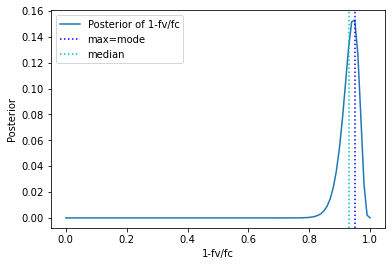

In [11]:
# Evidence for the covid-19 Moderna data, 2020
#
Nv = 15000 # volunteers that received the vaccine
Nc = 15000 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19
f_min   = 0.0000001
f_max   = 0.9999999
f_bsize = 1/(100*np.sqrt(max(Nc,Nv)))
f_nbin  = int((f_max-f_min)/f_bsize)

prior = 1/(f_max-f_min)

a_min  = 0.00001
a_max  = 1.0
a_nbin = 100
a = np.linspace(a_min, a_max, a_nbin) 

post_a      = []
post_a_norm = 0

post_max = 0
a_at_max = 0

for x in range(len(a)):
    
    post = 0
    for b in range(f_nbin):
            fc = f_min + b*f_bsize
            fv = fc * (1-a[x])
            if fv > 0:
                pdf_c, logpdf_c = binomial_posterior(fc, Nc, nc)
                pdf_v, logpdf_v = binomial_posterior(fv, Nv, nv)
                #post += pdf_c * pdf_v
                post  += np.exp(logpdf_c + logpdf_v)
    post_a.append(post)
    post_a_norm += post

    # find max prob_a and efficiency (a) at which max happens
    if post > post_max:
        post_max = post
        a_at_max = a[x]
           
cum = 0
for x in range(len(a)):
    cum += post_a[x]/post_a_norm
    if cum <= 0.5:
        a_median = a[x]

# max/median
print("median    a=", a_median)
print("max(mode) a=", a_at_max)

plt.plot(a, post_a/post_a_norm, label = "Posterior of 1-fv/fc")
plt.axvline(x=a_at_max, color='b', ls=':', label='max=mode')
plt.axvline(x=a_median, color='c', ls=':', label='median')
plt.legend()
plt.xlabel ('1-fv/fc')
plt.ylabel ('Posterior')
plt.show()


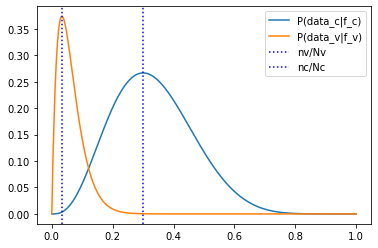

P(D|H1 [fv < fc]) =  0.0028758708438290817


In [12]:
# Wednesday 9/25 2024
#
# Using the data evidence P(data|H) to compare hypotheses
#--------------------------------------------------------
# let's test that:
#
# P(H1|data)/P(H0|data) = P(data|H1)/P(data|H0)
#
# Calculate the evidence
#
# P(data|H1 [f_v < f_c])
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

#integration range
#
# the probability of contracting disease
f_min  = 0.0000001
f_max  = 0.9999999
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) 

def binomial_pdata(f, N, n):
    ff = 1.0 - f # probability of not contracting disease
    
    # log[(N)!] - log[n!] - log[N-n)!]
    logcoeff  = np.real(special.loggamma(N+1))
    logcoeff -= np.real(special.loggamma(N-n+1))
    logcoeff -= np.real(special.loggamma(n+1))
                      
    # pdf    = coeff * f^n * (1-f)^{N-n}
    # logpdf = logcoeff + n*log(f) + (N-n)*log(1-f)
    logpdf = logcoeff + n*np.log(f) + (N-n)*np.log(ff)
    pdf    = np.exp(logpdf)
                    
    return pdf, logpdf

# the probability of the data given f
pdata_v  = binomial_pdata(f, Nv, nv)
pdata_c  = binomial_pdata(f, Nc, nc)
plt.plot(f, pdata_c[0], label = "P(data_c|f_c)")
plt.plot(f, pdata_v[0], label = "P(data_v|f_v)")
plt.axvline(x=nv/Nv, color='b', ls=':', label='nv/Nv')
plt.axvline(x=nc/Nc, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

area_H1  = 1.0
prior    = 1/area_H1
pdata_H1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc:
            pdata_H1 += pdata_v[0][bv]*pdata_c[0][bc] * prior

pdata_H1 *= f_bin * f_bin
print("P(D|H1 [fv < fc]) = ", pdata_H1)


In [13]:
# Calculate the evidence for 
# P(data | H0 [fc = fv])
# 
#

area_H0  = 1
prior    = 1/area_H0
pdata_H0 = 0
for b in range(f_nbin):
    pdata_H0 += pdata_v[0][b]*pdata_c[0][b] * prior
    
pdata_H0 *= f_bin

print("P(data|H0, fv=fc) = ", pdata_H0)

# P(H1|data) / P(H0|data) = P(data|H1) / P(data|H0)
#
print("H1/H0  = ", pdata_H1/pdata_H0)


P(data|H0, fv=fc) =  0.0009577497977263339
H1/H0  =  3.0027370933998663


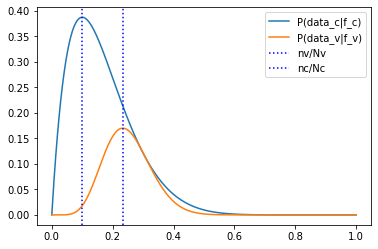

P(data|H1 [fv < fc]) =  0.0006930190420693482
P(data|H0 [fv=fc]) =  0.00643621521810131
H1/H0  =  0.10767493295132377
H0/H1  =  9.28721265563329


In [16]:
# TESTING different data
# Can P(H0|D) > P(H1|D)??
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 7  # received vaccine and contracted plague
nc = 1  # no vaccine and contracted plague

# Calculate the evidence
#
# P(data|H1 [f_v < f_c])
#

#integration range
#
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)

# the probability of contracting disease
f      = np.linspace(f_min, f_max, f_nbin) 

# the probability of the data given f
pdata_v  = binomial_pdata(f, Nv, nv)
pdata_c  = binomial_pdata(f, Nc, nc)
plt.plot(f, pdata_c[0], label = "P(data_c|f_c)")
plt.plot(f, pdata_v[0], label = "P(data_v|f_v)")
plt.axvline(x=nv/Nv, color='b', ls=':', label='nv/Nv')
plt.axvline(x=nc/Nc, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

area_H1  = 1.0
prior    = 1/area_H1
pdata_H1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc:
            pdata_H1 += pdata_v[0][bv]*pdata_c[0][bc] * prior

pdata_H1 *= f_bin * f_bin
print("P(data|H1 [fv < fc]) = ", pdata_H1)

# Calculate the evidence for 
# P(data | H0 [fc = fv])
# 
#

area_H0  = 1
prior    = 1/area_H0
pdata_H0 = 0
for b in range(f_nbin):
    f = f_min + b*f_bin

    pdata_H0 += pdata_v[0][b]*pdata_c[0][b] * prior
    
pdata_H0 *= f_bin

print("P(data|H0 [fv=fc]) = ", pdata_H0)

# P(H1|data) / P(H0|data) = P(data|H1) / P(data|H0)
#
print("H1/H0  = ", pdata_H1/pdata_H0)
print("H0/H1  = ", pdata_H0/pdata_H1)


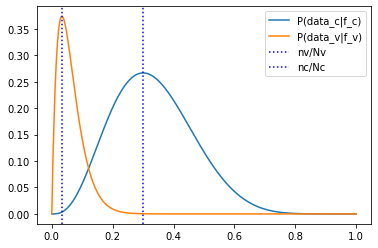

P(data|H1 [fv < fc]) =  0.005751741687658163
P(data|H1 [fv < fc]) =  -5.1582525678435065 0.005751741687621133
P(data|H1 [fv < fc]) =  -5.158252567837012 0.005751741687658487


In [15]:
# in log space
# 

# logsumexp
# logsumpexp([a,b])   = log(exp(a) + exp(b))
# logsumpexp([a,b,c]) = log(exp(a) + exp(b) + exp(c))
#
# logsumpexp([a,b,c]) = logsumexp([logsumexp([a,b]),c])

from scipy.special import logsumexp

Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

# Calculate the evidence
#
# P(data|H1 [f_v < f_c])
#

#integration range
#
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)

log_f_bin = np.log(f_bin)

# the probability of contracting disease
f      = np.linspace(f_min, f_max, f_nbin) 

# the probability of the data given f
pdata_v  = binomial_pdata(f, Nv, nv)
pdata_c  = binomial_pdata(f, Nc, nc)
plt.plot(f, pdata_c[0], label = "P(data_c|f_c)")
plt.plot(f, pdata_v[0], label = "P(data_v|f_v)")
plt.axvline(x=nv/Nv, color='b', ls=':', label='nv/Nv')
plt.axvline(x=nc/Nc, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

area_H1  = 0.5
prior    = 1/area_H1
logprior = np.log(prior)

#initialize
pdata_H1    = 0
logpdata_H1 = float('-inf')
logpdata_H1_list = []

for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc:
            this_prob = pdata_v[0][bv] * pdata_c[0][bc] * prior
            this_logp = pdata_v[1][bv] + pdata_c[1][bc] + logprior
            
            pdata_H1    += this_prob            
            logpdata_H1  = logsumexp([logpdata_H1,this_logp])
            logpdata_H1_list.append(this_logp)

pdata_H1         *= f_bin * f_bin
logpdata_H1      += log_f_bin + log_f_bin
logpdata_H1_list = logsumexp(logpdata_H1_list) + log_f_bin + log_f_bin

print("P(data|H1 [fv < fc]) = ", pdata_H1)
print("P(data|H1 [fv < fc]) = ", logpdata_H1, np.exp(logpdata_H1))
print("P(data|H1 [fv < fc]) = ", logpdata_H1_list, np.exp(logpdata_H1_list))

